In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [3]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df.shape

(50882, 14)

In [5]:
(df.isnull().sum()/df.shape[0])*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [6]:
(test.isnull().sum()/df.shape[0])*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator            9.879722
Holding_Policy_Duration    16.907747
Holding_Policy_Type        16.907747
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [7]:
df.shape

(50882, 14)

In [8]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [9]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [10]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [11]:
df['Holding_Policy_Duration'][df['Holding_Policy_Duration']=='14+']=float(15)
test['Holding_Policy_Duration'][test['Holding_Policy_Duration']=='14+']=float(15)


<ipython-input-11-bd06c3db9bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holding_Policy_Duration'][df['Holding_Policy_Duration']=='14+']=float(15)
<ipython-input-11-bd06c3db9bed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Holding_Policy_Duration'][test['Holding_Policy_Duration']=='14+']=float(15)


In [12]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
15.0    4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df['Health Indicator']=df['Health Indicator'].fillna('na')
test['Health Indicator']=test['Health Indicator'].fillna('na')


In [16]:
df['Health Indicator'].value_counts()

X1    13010
na    11691
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [17]:
le.fit(df['Health Indicator'])

LabelEncoder()

In [18]:
le.classes_

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'na'],
      dtype=object)

In [19]:
df['Health Indicator'] = le.transform(df['Health Indicator'])
test['Health Indicator'] = le.transform(test['Health Indicator'])


In [20]:
le.inverse_transform([0, 0, 1, 2])

array(['X1', 'X1', 'X2', 'X3'], dtype=object)

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)

In [22]:
df['Holding_Policy_Type']=imputer.fit_transform(np.array(df['Holding_Policy_Type']).reshape(-1, 1))
test['Holding_Policy_Type']=imputer.fit_transform(np.array(test['Holding_Policy_Type']).reshape(-1, 1))


In [23]:
imputer = KNNImputer(n_neighbors=10)

In [24]:
df['Health Indicator']=imputer.fit_transform(np.array(df['Health Indicator']).reshape(-1, 1))
test['Health Indicator']=imputer.fit_transform(np.array(test['Health Indicator']).reshape(-1, 1))


In [25]:
imputer = KNNImputer(n_neighbors=15)

In [26]:
df['Holding_Policy_Duration']=imputer.fit_transform(np.array(df['Holding_Policy_Duration']).reshape(-1, 1))
test['Holding_Policy_Duration']=imputer.fit_transform(np.array(test['Holding_Policy_Duration']).reshape(-1, 1))


In [27]:
(df.isnull().sum()/df.shape[0])*100

ID                         0.0
City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
dtype: float64

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb = GaussianNB()

In [30]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator           float64
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [31]:
le.fit(df['City_Code'])

LabelEncoder()

In [32]:
df['City_Code']= le.transform(df['City_Code'])
test['City_Code']= le.transform(test['City_Code'])


In [33]:
le.fit(df['Accomodation_Type'])
df['Accomodation_Type']= le.transform(df['Accomodation_Type'])
test['Accomodation_Type']= le.transform(test['Accomodation_Type'])
le.fit(df['Reco_Insurance_Type'])
df['Reco_Insurance_Type']= le.transform(df['Reco_Insurance_Type'])
test['Reco_Insurance_Type']= le.transform(test['Reco_Insurance_Type'])
le.fit(df['Is_Spouse'])
df['Is_Spouse']= le.transform(df['Is_Spouse'])
test['Is_Spouse']= le.transform(test['Is_Spouse'])

In [34]:
df.dtypes

ID                           int64
City_Code                    int32
Region_Code                  int64
Accomodation_Type            int32
Reco_Insurance_Type          int32
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int32
Health Indicator           float64
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [38]:
X = df.drop(['Response'],axis=1)
Y = np.array(df['Response']).reshape(-1, 1)

In [39]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [41]:
gnb.fit(X,y)

C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [ ]:
out = gnb.predict(y)

In [ ]:
pd.Series(out).value_counts()

In [ ]:
df['Response'].value_counts()

In [ ]:
# Trails 1 /

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
names = ['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium']

In [111]:
X = df.drop(['Response'],axis=1)
Y = np.array(df['Response']).reshape(-1, 1)

In [146]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.760053 (0.005518)
LDA: 0.760053 (0.005518)
KNN: 0.711391 (0.003949)
CART: 0.666365 (0.005408)
NB: 0.760053 (0.005518)
SVM: 0.760053 (0.005518)


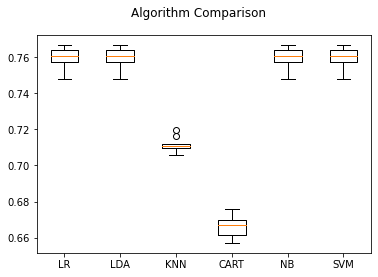

In [147]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [123]:
lg =KNeighborsClassifier()

In [141]:
lg.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
out = lg.predict(test.drop(['ID'],axis=1))

In [143]:
pd.Series(out).value_counts()

0    21776
1       29
dtype: int64

In [144]:
ot = pd.DataFrame()
ot['ID']=test['ID']
ot['Response'] = pd.Series(out)
ot.to_csv("output.csv")

In [145]:
ot.to_csv("output.csv",index=False)

In [131]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Text(0.5, 1.0, 'DEPTH vs ACCURACY')

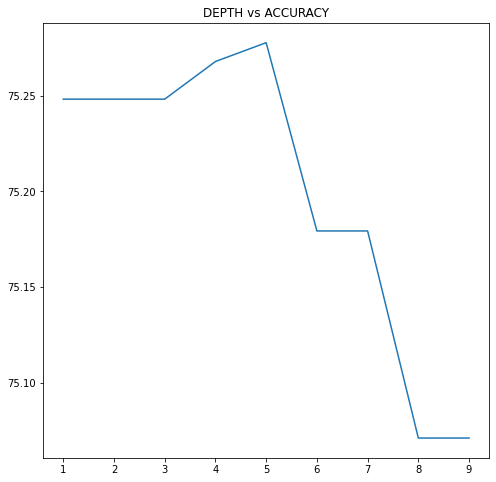

In [139]:
gx = []
gy = []
for i in range(1,10):
    gx.append(i)
    xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=5, max_depth=i)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("DEPTH vs ACCURACY")

In [140]:
lg = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=5, max_depth=5)

In [150]:
import pandas_profiling as pp 

In [164]:
df.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

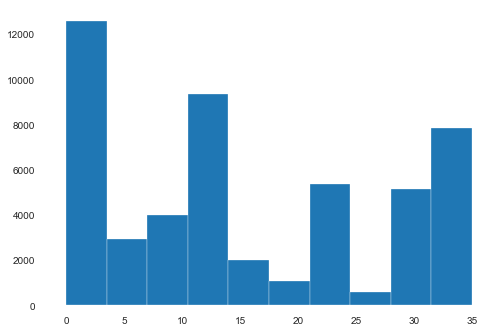

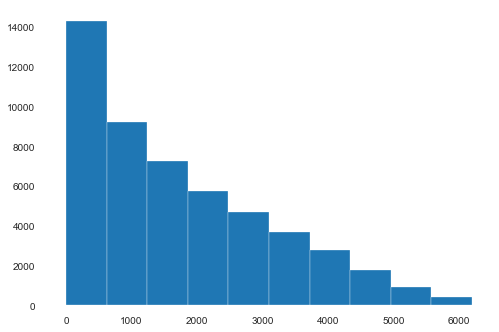

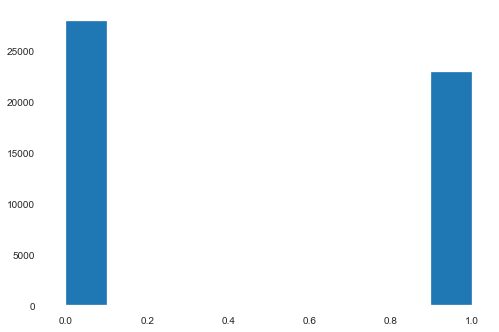

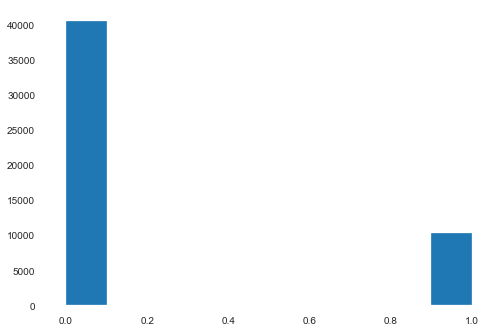

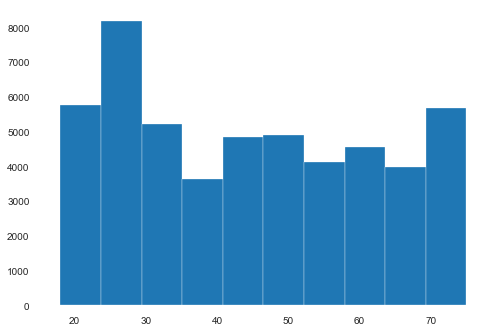

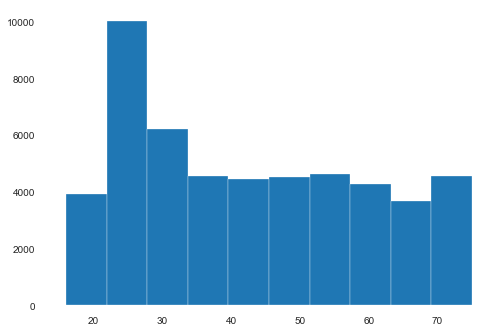

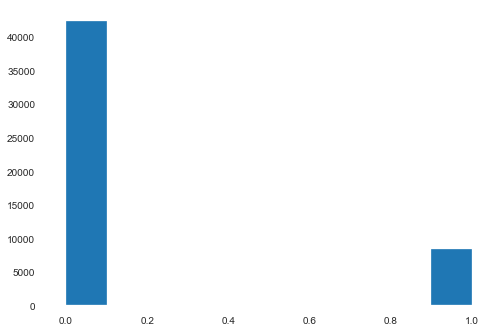

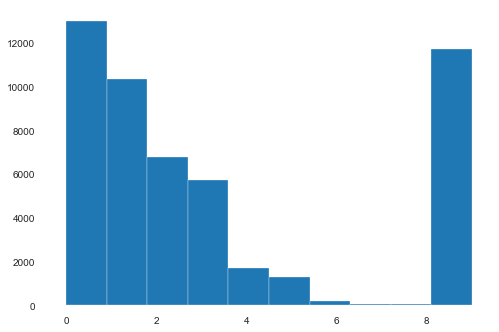

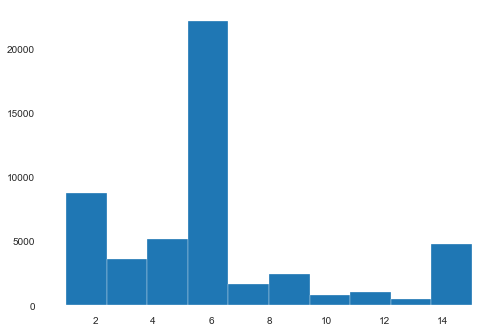

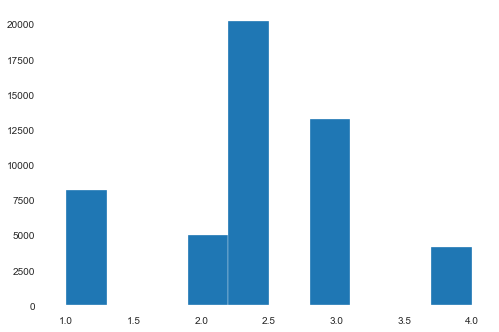

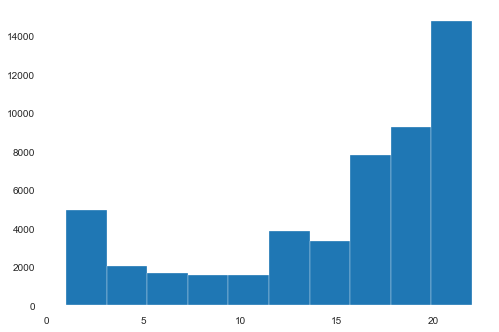

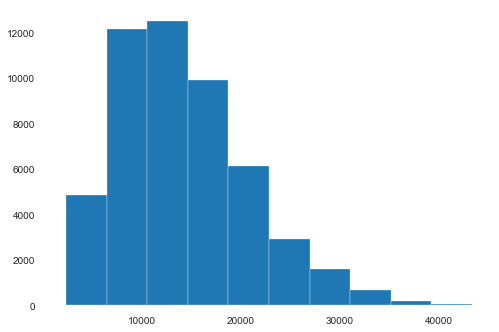

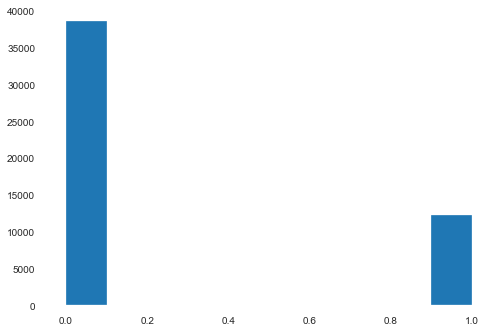

In [174]:
for i in df.columns:
    plt.hist(df[i])
    plt.show()